C04B21 Dual Energy Carbonate Core CT
====================================

This project is a set of dual energy medical CT scans of 3 ft carbonate core samples, made available by Rodolfo Victor at [Digital Rocks Portal](https://www.digitalrocksportal.org/), 
acquired with (0.488 X 0.488 X 1.25) mm voxel length at Petrobras Research Center. We will download the 
vuggy C04B21 sample. 

.. note:: 
   If you plan to use this data, please remember to [cite the data](https://www.digitalrocksportal.org/projects/102/cite/)
   and the
   [related publications](https://www.digitalrocksportal.org/projects/102/publications/).



Go to the Dual-energy medical CT in carbonate rocks project in the Digital Rocks Portal:
https://www.digitalrocksportal.org/projects/102. Click on the low-energy image `C04B21_Raw100keV`.

<img src="import_C04B21_dualenergy-img1.jpg" width="250"/>
 
Pay attention to the metadata! We'll need it later. An extra piece of information: this is [ImageJ/Fiji](https://fiji.sc/) exported raw data, so it is in Fortran file order.
Click `Action->Download File`.

<img src="import_C04B21_dualenergy-img2.jpg" width="250"/>

Repeat the procedure and download the high-energy image `C04B21_Raw140keV`.

Let's import the raw files into DRP. In this example we'll use DRP to optimize chunk size for 8 parallel processes:

In [1]:
import drp
shape=(512, 512, 738) #<- image size
N = 8 #<- Number of parallel processes we intend to use
chunks = drp.optimize.chunksize(shape, N)
print(f'Chunk size: {chunks}')

C04B21_Raw100keV = drp.import_raw(
    rawfile='/MyDownloads/C04B21Raw100keV.raw', #<- Change here!
    shape=shape,
    dtype='<i2', #<- 16-bit signed integer, little-endian
    offset=0,
    voxel_length=(0.488, 0.488, 1.25),
    voxel_unit='mm',
    raw_file_order='F', #<- Fortran file order
    store='/estgf_dados/P_D/GOB7/C04B21Raw100keV.zarr',
    chunks=chunks,
    overwrite=True
    )

C04B21_Raw140keV = drp.import_raw(
    rawfile='/MyDownloads/C04B21Raw140keV.raw', #<- Change here!
    shape=shape,
    dtype='<i2', #<- 16-bit signed integer, little-endian
    offset=0,
    voxel_length=(0.488, 0.488, 1.25),
    voxel_unit='mm',
    raw_file_order='F', #<- Fortran file order
    store='/estgf_dados/P_D/GOB7/C04B21Raw140keV.zarr',
    chunks=chunks,
    overwrite=True
    )

ModuleNotFoundError: No module named 'drp'

That's it! You can start working with this data. Let's do some simple visualization:

(<Figure size 800x800 with 3 Axes>,
 [[<Axes: title={'center': 'z=461.25 mm'}, xlabel='x (mm)', ylabel='y (mm)'>,
   <Axes: title={'center': 'x=124.93 mm'}, xlabel='z (mm)', ylabel='y (mm)'>],
  [<Axes: title={'center': 'y=124.93 mm'}, xlabel='x (mm)', ylabel='z (mm)'>,
   None]])

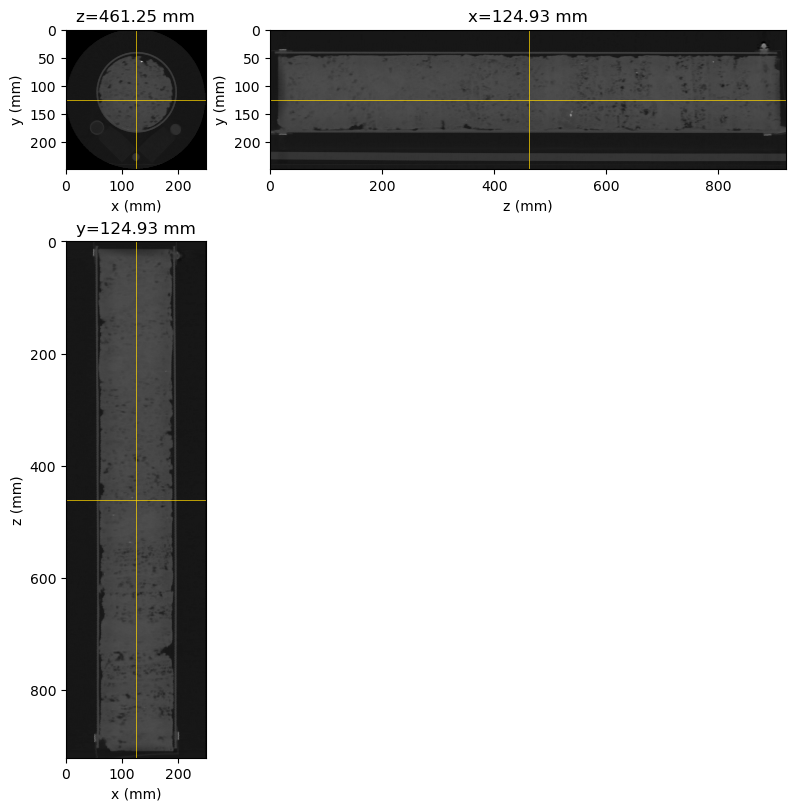

In [2]:
drp.plot.orthogonal_slices(C04B21_Raw100keV)


(<Figure size 800x800 with 3 Axes>,
 [[<Axes: title={'center': 'z=461.25 mm'}, xlabel='x (mm)', ylabel='y (mm)'>,
   <Axes: title={'center': 'x=124.93 mm'}, xlabel='z (mm)', ylabel='y (mm)'>],
  [<Axes: title={'center': 'y=124.93 mm'}, xlabel='x (mm)', ylabel='z (mm)'>,
   None]])

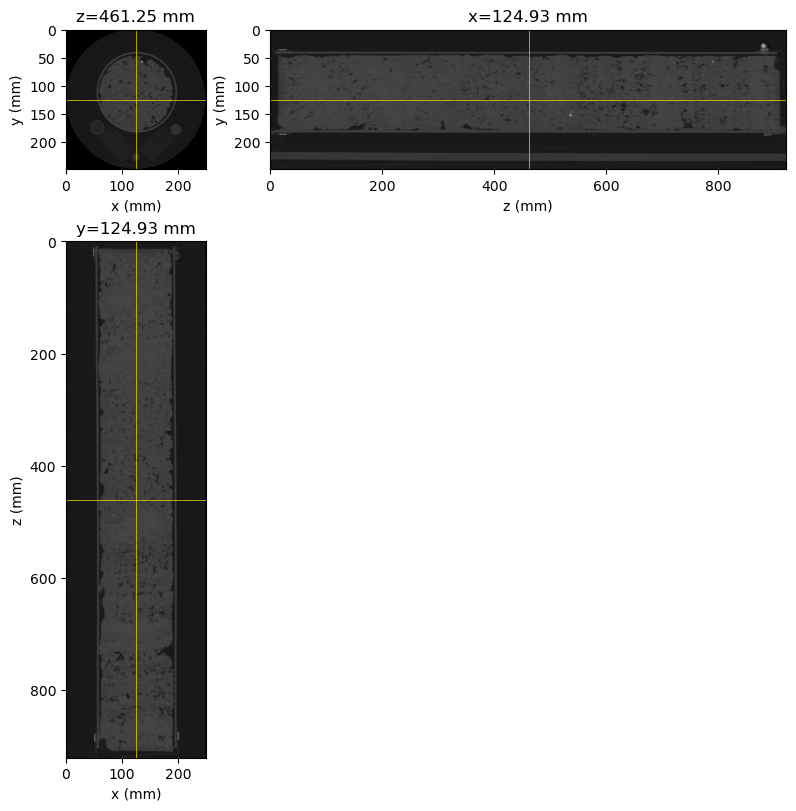

In [3]:
drp.plot.orthogonal_slices(C04B21_Raw140keV)

(<Figure size 800x216.677 with 1 Axes>,
 [[None,
   <Axes: title={'center': 'x=124.93 mm'}, xlabel='z (mm)', ylabel='y (mm)'>],
  [None, None]])

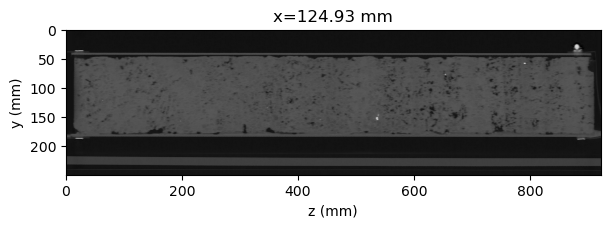

In [4]:
drp.plot.orthogonal_slices(C04B21_Raw140keV, planes=('zy',), draw_guide_lines=False)


Related tutorials
-----------------

Below are some more tutorials using this data.

```
.. nbgallery::
   ../plot_f
```